# Fundamentals of NLP (Chapter 1): Tokenization, Lemmatization, Stemming, y Sentence Segmentation

**Fuentes** 

- [Model Languages from spaCyu](https://spacy.io/usage/models#languages)
- [Speech and Language Processing - Jurafsky and Martin](https://web.stanford.edu/~jurafsky/slp3/)
- [Python for NLP: Tokenization, Stemming, and Lemmatization with SpaCy Library](https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/)
- [Stemming](https://en.wikipedia.org/wiki/Stemming)
- [Lemmatizer](https://spacy.io/api/lemmatizer#init)
- [Stanford IR Book](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
- [Linguistic Features by spaCy](https://spacy.io/usage/linguistic-features#sbd-custom)
- Elvis Saravia ( [Twitter](https://twitter.com/omarsar0) | [LinkedIn](https://www.linkedin.com/in/omarsar/))



Técnicas básicas:
-*lemmatization*
-*stemming*-
-*tokenization*
-*sentence segmentation*

Todas son vitales para entrenar modelos de NLP efectivos

---

## Tokenization

![alt text](https://drive.google.com/uc?export=view&id=1h0ZNzohff1nUWMerrW50eDxY99ArRJTK)

Primera parte de cualquier problema básico de NLP! Tokenizar es encontrar los tokens individuales en los textos, y son la base de la construcción de vocabularios que se utilizarán en el modelo de lenguaje que vas a crear.

Los tokens son la mínima unidad de significado, pueden ser palabras, pero también números o signos ?!-,;

¿Como conseguimos dividirlo en tokens? Primero vamos a probar a dividirlo por espacios


In [44]:
## librerias necesarias, (en_ es el idioma del modelo , web_ sobre que esta entrenado y sm_ el tamaño del modelo)

!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm


Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.6)
Requirement already up-to-date: spacy-lookups-data in /usr/local/lib/python3.7/dist-packages (1.0.0)
2021-04-24 10:36:49.058332: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2021-04-24 10:36:55.853040: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [45]:
## tokenizando un texto
doc = "Saturdays are my favourite part of the week"
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)

Token 0: Saturdays
Token 1: are
Token 2: my
Token 3: favourite
Token 4: part
Token 5: of
Token 6: the
Token 7: week


En este ejemplo sencillo funciona perfectamente, pero en la vida real los textos suelen tener más "ruido" y son mucho más complejos.

En ingles, como dividirías palabras como "pseudo-code"? Dos tokens o uno?


---
**Exercise** : Copia el código de arriba y añade espacios blancos extra en doc. ¿Que ocurre?¿Como lo soluciarías?. 

In [46]:
###  ENTER CODE HERE
import re
doc = "Saturdays  are my favourite  part of the week"
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)
### 

Token 0: Saturdays
Token 1: 
Token 2: are
Token 3: my
Token 4: favourite
Token 5: 
Token 6: part
Token 7: of
Token 8: the
Token 9: week


---

La tokenizacion tiene muchas variantes, modelos avanzados como [BERT](https://arxiv.org/pdf/1810.04805.pdf) utilizan "subwords" dentro de las palabras, que ayuda con problemas como Out of Vocabulary (OOV).


In [47]:
## import the libraries

import spacy

## load the language model
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

## tokenization
doc = nlp_en("This is the so-called tokenization, I heard about it in New York")
for token in doc:
    print(token.text)
    
##prueba una frase en español
doc = nlp_es("Como tu te llamas yo lo sé")
for token in doc:
    print(token.text)

This
is
the
so
-
called
tokenization
,
I
heard
about
it
in
New
York
Como
tu
te
llamas
yo
lo
sé


El tokenizador de spacy se basa en un modelo de lenguaje ya construido. Puedes introducir distintos textos en `nlp_en()` y probar como aplica excepciones "`" y ".", "-", etc. Puedes añadirle tus propias reglas ;)  [aquí](https://spacy.io/usage/linguistic-features#special-cases).
---

## Lemmatization

![alt text](https://drive.google.com/uc?export=view&id=1_-wxBOU_JebjdG1sxoobKYRCtX3dVF0L)

[Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) es el proceso de tomar tokens individuales de una frase y intentar redurilos a su forma base. Se hace mediante analisis morfologico para eliminar inflexiones. El output? Su *lemma*. Por ejemplo en ingles: am, were,is todas vuelven a be. En español fui,somos,fuiste se convierten en ser..

¿Y todo esto para que?
Normalizar texto para clasificación, motores de busqueda, analisis de sentimiento... Cuanto mas complejo sea el lenguaje, mas importante

Usemos spaCy para lematizar [aqui](https://spacy.io/api/lemmatizer#_title):

In [48]:
## import the libraries
from spacy.lookups import Lookups

## lemmatization
doc = nlp_en(u'I love coding and writing in the afternoon with my friends that are great')
for word in doc:
    print(word.text, "=>", word.lemma_)

I => I
love => love
coding => code
and => and
writing => write
in => in
the => the
afternoon => afternoon
with => with
my => my
friends => friend
that => that
are => be
great => great


Resultados normales, excepto el primero, porque PRON? 

Pues, segun la documentación de spaCy :
"*This is in fact expected behavior and not a bug. Unlike verbs and common nouns, there’s no clear base form of a personal pronoun. Should the lemma of “me” be “I”, or should we normalize person as well, giving “it” — or maybe “he”? spaCy’s solution is to introduce a novel symbol, -PRON-, which is used as the lemma for all personal pronouns.*"



---

**Exercise** Añade 2 frases en español con espacios extra, signos de puntuación, prefijos sufijos... ¿Que ocurre?

In [49]:
### ENTER CODE HERE
doc = nlp_es(u'Me gusta  jugar a la consola por las mañanas mientras desayuno precavidamente para que no me pille la policía.')
for word in doc:
    print(word.text, "=>", word.lemma_)
###

Me => yo
gusta => gustar
  =>  
jugar => jugar
a => a
la => el
consola => consola
por => por
las => el
mañanas => mañana
mientras => mientras
desayuno => desayuno
precavidamente => precavidamente
para => para
que => que
no => no
me => yo
pille => pillir
la => el
policía => policía
. => .


---

## Stemming

![alt text](https://drive.google.com/uc?export=view&id=1XcK3OzdPd2ywO8Y4G6vfjuIFthPce3FH)

Stemming es una versión más sencilla de la lematización, donde nos interesa eliminar el sufijo al final de la palabra, quitando palabras 'derivadas' .

spaCy no hace stemming, podeis usar la libreria [NLTK](https://www.nltk.org/).

In [50]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
doc = 'I prefer not to argue'
for token in doc.split(" "):
    print(token, '=>' , stemmer.stem(token))

I => i
prefer => prefer
not => not
to => to
argue => argu


La versión stemizada de 'argue' es 'argu', porque 'argument'arguing'argued' son palabras derivadas de la misma raiz. 

---

**Exercise**  Prueba en español

In [51]:
###  ENTER CODE HERE
stemmer_es = SnowballStemmer('spanish')
doc = 'Porqué sigues con él si borracha me confesaste que el no te lo hace bien'
for token in doc.split(" "):
    print(token, '=>' , stemmer_es.stem(token))
###

Porqué => porqu
sigues => sig
con => con
él => el
si => si
borracha => borrach
me => me
confesaste => confes
que => que
el => el
no => no
te => te
lo => lo
hace => hac
bien => bien


---

## Sentence Segmentation

![alt text](https://drive.google.com/uc?export=view&id=1aeHpGNWdnA_VdP0VAu7sO1OGW2eusgHH)

Cuando se trata de un texto, siempre es habitual que tengamos que dividirlo en sus oraciones individuales. Es lo que se conoce como segmentación de frases: el proceso de obtener las frases individuales de un corpus de texto. Los segmentos resultantes pueden ser analizados individualmente con las técnicas que hemos aprendido previamente.

En la librería de spaCy, tenemos la opción de utilizar un segmentador de oraciones incorporado (entrenado en modelos estadísticos) fantástico.

Si lo intentaramos nosotros, hariamos algo parecido a esto:

In [52]:
## using a simple rule-based segmenter with native python code
text = "I love coding and programming. I also love sleeping!"

current_position = 0
cursor = 0
sentences = []
for c in text:
    if c == "." or c == "!":
        sentences.append(text[current_position:cursor+1])
        current_position = cursor + 2
    cursor+=1

print(sentences)

['I love coding and programming.', 'I also love sleeping!']


Nuestro segmentador de frases sólo segmenta las frases cuando encuentra un límite de frase que, en este caso, es un "." o un "!". Un problema de este código es que no es capaz de diferenciar entre abreviaturas como Dr. y números como 0,4. 

Probemos la segmentación de frases que ofrece spaCy. Ejecuta el código de abajo e inspecciona los resultados.

In [53]:
doc = nlp_en("I love coding and programming. I also love sleeping!")
for sent in doc.sents:
    print(sent.text)

I love coding and programming.
I also love sleeping!


---

In [54]:
###  ENTER CODE HERE
doc = nlp_es("Dímelo tu klk. EJEJE klonk dime a ver cuanto es. Pa darte de una vez.")
for sent in doc.sents:
    print(sent.text)
###

Dímelo tu klk.
EJEJE klonk dime a ver cuanto es.
Pa darte de una vez.


---

## ¿Cómo se utiliza con el ML?

Cuando se trabaja con información textual, es imprescindible limpiar los datos para poder entrenar modelos de aprendizaje automático (ML) más precisos. 

Una de las razones por las que transformaciones como la lematización y el stemming son útiles es para normalizar el texto antes de alimentar la salida a un algoritmo de ML. Por ejemplo, si está construyendo un modelo de análisis de sentimientos, ¿cómo puede decirle al modelo que "sonreír" y "sonrisa" se refieren al mismo concepto? Es posible que tenga que hacer un stemming si utiliza características [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) combinadas con un algoritmo de aprendizaje automático como el [clasificador Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). Como ya se puede sospechar, esto también requiere un tokenizador realmente bueno para obtener las características, especialmente cuando se trabaja con piezas de texto ruidosas que podrían generarse a partir de los usuarios en un sitio de redes sociales (piensa en los emojis!!)



## Os toca!!!

#### Carga de librerías básicas, the usual stuff

In [55]:
import re   
from sklearn.datasets import load_files 
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import nltk
#nltk.download('stopwords')     <- Os tocará descargarlo la primera vez
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

#### Carga de datos, next!

In [56]:
# cargar el conjunto de datos
df = pd.read_csv('hhgroups_merge_28_05.csv')

In [57]:
# como es el conjunto de datos, ver los primeros registros
df.head()

,id,artista,cancion,album,letra,anyo,visitas
0,0,Denom,Machete (con Jarfaiter y Gente jodida),Medicina,"Para su nuevo disco ""Medicina"", Denom ha vuelt...",2019,126
1,1,Denom,Vacío (con Ivo Incuerdo),Medicina,"[Denom]\nYo que quería, yo que pedía vida,\nSe...",2019,361
2,2,Denom,El orgullo es fiel (con Juancho Marqués y Elio...,Medicina,"""El orgullo es fiel"" es uno de los cortes incl...",2019,262
3,3,Denom,Mueve mueve (con Fernandocosta),Medicina,"[Estribillo: Denom] (x2)\nMueve, mueve, mueve,...",2019,578
4,4,Jaro Desperdizio,Insomnia,"Sin álbum, es un vídeo suelto","[Estribillo]\nY en esta noche, ¿Quién me arrop...",2019,219


## Vamos a hacernos un precioso problema con esto

Ya sabemos que hay varios "individuos" por llamarlos de alguna manera  ;)  en este conjunto de datos. Por simplificar, vamos a elegir a un par de ellos a ver si somos capaces de entrenar un mero clasificador

In [58]:
# ver el número de canciones de cada artista
df.artista.value_counts()

Porta          157
SFDK           140
Nach           128
Toteking       101
El Chojin       91
              ... 
Leonida          1
Amnis Aeris      1
Fase             1
Puga             1
Gino             1
Name: artista, Length: 1609, dtype: int64

Pues ya que son de los que más observaciones tenemos, elegimos a Porta y a SFDK

In [61]:
# Seleccionar a los artistas deseados
df = df[(df.artista == 'Porta') | (df.artista == 'SFDK')]
# importante, resetead el índice para que todo quede en orden
df = df.reset_index(drop=True)

### Separar por un lado los textos y por otro el artista

In [62]:
df.head()

,id,artista,cancion,album,letra,anyo,visitas
0,10,Porta,Otra salida (con Uve Sad),Off,[Estribillo: Uve Sad]\nNunca pensé lo que serí...,2019,86
1,11,Porta,Rap&Roll,Off,"Nos dicen que recordemos los ideales, no al ho...",2019,95
2,12,Porta,Nunca volverá,Off,"El tiempo corre tan deprisa,\nQue sin darnos c...",2019,2868
3,50,SFDK,Duelo de vikingos (con Promoe),2001 Odisea en el lodo,[Promoe]\nEvery single time Promo and the Loop...,2003,222
4,51,SFDK,Esta canción va dedicada...,2001 Odisea en el lodo,[Zatu]\nPonme en on y se bienvenido al infinit...,2003,303


In [63]:
textos = df.letra
artista = df.artista

## 1 - Exploración de los textos


#### ¿Nulos?

In [64]:
# eliminar nulos, si hay
df.isnull().sum()

id         0
artista    0
cancion    0
album      0
letra      0
anyo       0
visitas    0
dtype: int64

#### ¿Hay anciones repetidas en el conjunto?

In [65]:
# eliminar letras repetidas, si hay
print(len(textos.unique()), len(textos))

297 297


#### Imprime un texto a ver que pinta tiene

In [68]:
# imprimir un texto
textos[3]

"[Promoe]\nEvery single time Promo and the Loop Troop Rockers (C´mon!),\nRoll through the police wanna stop us,\nAnd I know mi Spanish gente feel me,\nFuck CIA! Guardia Civil tryin´ to kill me,\nI spit hits like I´m never out of rounds,\nAnd even when I´m on tracks you can bet I´m out of bounce hits,\nSFDK and this kid from outta town,\nHis name? Promo, not mainstream or underground,\nCause if you´re hip hop to the bone marrow then I´m cancer,\nAnd if we tour the same period, better cancel,\nI thought I might as well tell ya or your fans will,\nAnd you´ll find out the hard way for your damn self,\nYour plans fail, you want your welfare cheque back,\nBut it´s no longer there due to government setbacks (Take that!),\nPut it in your glass pipe and smoke it,\nSome hard rock shit, your asswipe´s hoping (for what?),\nFor a cypher but our past mic´s broken,\nThis so-called rap game, I blast wide open,\nDon´t be scared; I won´t kill ya,\nSFDK: Welcome to Sevilla.\n\n\n[Estribillo]\nIt´s Promoe

#### Implementar la función de limpiado de texto

La idea de esta función es que dado un texto lo procese adecuadamente para su posterior tratamiento con TF-IDF, tal y como habéis visto en la teoría. Para ello nos vamos a basar en el texto que hemos impreso antes para ver qué cosas especiales tiene. Para esta función recomendamos usar los paquetes `re` y `unidecode`

In [75]:
import unidecode
def doClean(text):   
    
    # Quitar las expresiones entre llaves que denotan las partes de la canción
    a = re.sub(r'\[.+\]', ' ', str(text))
    # Quitar las aclaraciones entre paréntesis
    a = re.sub(r'\(.+\)', ' ', str(a))
    # Quitar acentos 
    a = unidecode.unidecode(a)
    # Quitar aquello que no sean palabras o cosa que se le parezca
    a = re.sub(r'\W', ' ', a)
    # Quitar espacios extra en caso de haber
    a = re.sub(r'\s+', ' ', a, flags=re.I)
    # Pasar el texto a minúsulas
    a = a.lower()
    # retirar stopwords
    a = a.split()
    a = [word for word in a if word not in stopwords.words('spanish')]
    a = " ".join(a)

    return a

Aplicar la función a nuestro conjunto de textos es tan sencillo como esto:

In [78]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [79]:
textos_limpios = textos.apply(doClean)

Imprime uno, a ver qué tal ha quedado 

In [80]:
textos_limpios[0]

'nunca pense seria desvie trace via merezco muerte vida ayudame encontrar salida nunca pense seria desvie trace via merezco muerte vida ayudame encontrar salida dormir angustiare dire sido culpa llamare hare saber gana disculpas aunque sepa mentira pesar herida irrita sigo mirando hacia arriba pensando dia acabe vida mirame bien puedes resolver ey fijate puedo sostener ey fe aleje siempre di cien ey ahora quiero mirar mas atras tal vez despues tiempo pueda respirar ey asi sigo mal consigo amar nunca pense seria desvie trace via merezco muerte vida ayudame encontrar salida nunca pense seria desvie trace via merezco muerte vida ayudame encontrar salida hace deje callar quiza da igual puedan pensar suda tiempo pa dudas vida cruda llaman realidad pierdes vuelve suenos cumplen solo si duermes podeis verme ojeras panda basta jungla verde pienso esconderme si feliz miras hacia atras fin dejo cicatriz fin delfin zoo quedo mar pa descansar carga mientras starbucks rapeandole barman sigo larva v

Aqui puedes usar las tecnicas que comentamos al principio!

## 2 - TF-IDF

Vamos a transformar nuestros textos limpitos a forma de matriz. Para ello usamos `TfidfVectorizer` de `sklearn.feature_extraction.text`

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Elegir cuántas palabras vamos a querer que tenga nuestro vocabulario
tfidfconverter = TfidfVectorizer(max_features=125)
# aprender el transformador
X = tfidfconverter.fit_transform(textos_limpios).toarray()

#### Dibujar un wordcloud de uno de los textos

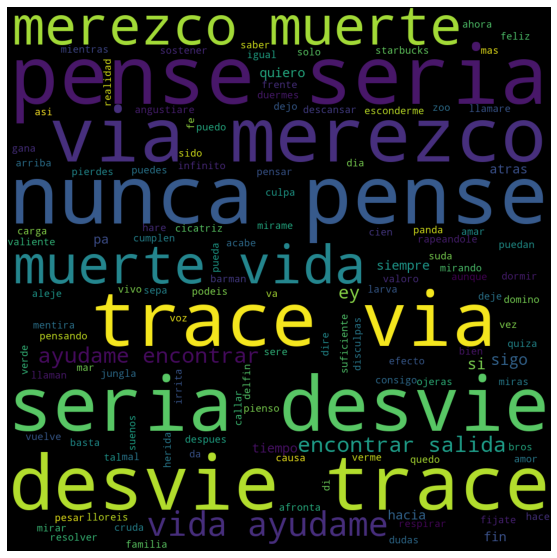

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 1000,min_font_size = 10).generate(str(textos_limpios[0]))
fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Obtener los k términos más importantes

Para esto tendréis que basaros en la lista de features de la nueva matriz y en la matriz tfidf

In [98]:
feature_array = np.array(tfidfconverter.get_feature_names())
tfidf_sorting = np.argsort(X).flatten()[::1]
n = 3 # numero de terminos
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['ahi', 'porta', 'poder'], dtype='<U8')

#### Un poquito de clustering a ver que tal ;)

Lo mismo que en la sesión de clustering, buscar los clusters que obtenemos, busquemos entre 2 y 15

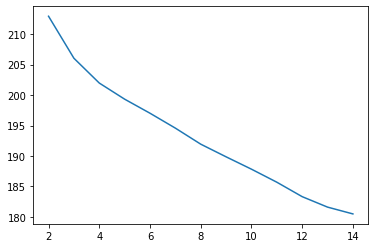

In [102]:
from sklearn.cluster import KMeans
import seaborn as sns

scores = []
k_values = range(2, 15)
for a in k_values:
  kmeans = KMeans(n_clusters=a, random_state=0).fit(X)
  scores.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=scores)

Si pintamos el factorplot igual que el otro dia, ¿Quedará igual de bien?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


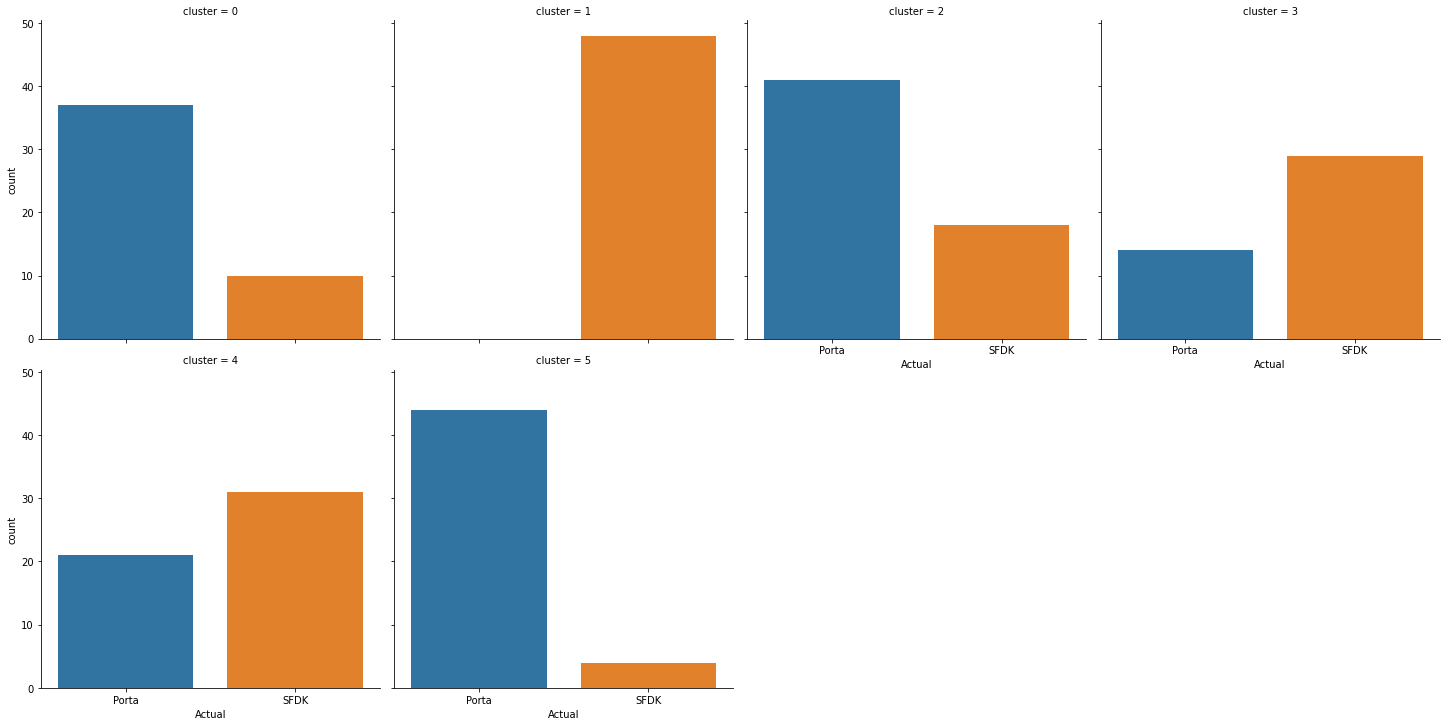

In [103]:
# Aprender Kmeans con el valor de K obtenido
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

# Preparar el factorplot
cluster_result = pd.DataFrame()
cluster_result['cluster'] = kmeans.predict(X)
cluster_result['Actual'] = artista

ax = sns.factorplot(col='cluster', x='Actual', data=cluster_result, kind='count',col_wrap=4)

Vamos a pintar el conjunto de datos. Dos dibujos son particularmente importantes: 
1. Un scatterplot coloreado conlas etiquetas reales
2. Un scatterplot con el número de clusters que hayamos elegido

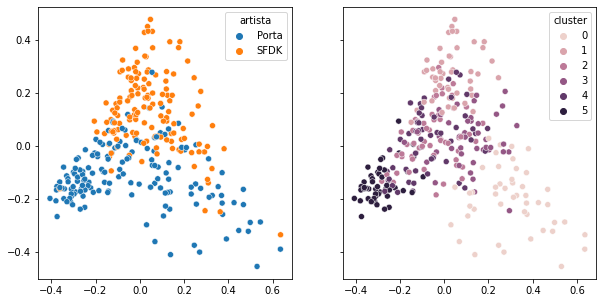

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
pintar = pca.transform(X)


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
dib1 = sns.scatterplot(x = pintar[:,0], y = pintar[:,1], hue = cluster_result['cluster'] , legend = "full", ax = ax2)
dib2 = sns.scatterplot(x = pintar[:,0], y = pintar[:,1], hue = artista , legend = "full", ax = ax1)

Vaya parece, que no sacamos mucho de Kmeans, asi que habrá que acudir a un clasificador a ver qué tal nos resuelve la papeleta

## 3 - Entrenamiento!

#### Partir el conjunto de entrenamiento

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, artista, test_size=0.33, random_state=42)

#### Entrenar un clasificador y sacar el accuracy

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Una mera prueba, yo le metí 50 en un primer intento
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9292929292929293

#### Dibujar la matriz de confusión

[[49  3]
 [ 4 43]]


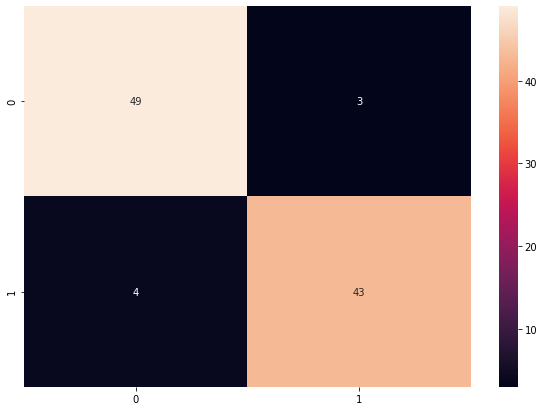

In [108]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
cnfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cnfm, annot= True)

print(cnfm)

## 4 - Aventura: ¿Ya pensabais que se acababa aquí no?

Como habéis podido ver, hemos usado solo la info básica, pero hay mucho que ajustar en lo que el texto se refiere. Se pueden añadir variables artificiales en base a las etiquetas que hemos quitado antes (corchetes y llaves). Os dejo esto ya a vuestra imaginación. No hay guía, no me he basado en ningún kernel, esto es campo abierto y un divertimento para vosotros, sorprendednos ;)


![title](./tenor.gif)

In [ ]:
# ADVENTURE